## German Traffic Sign Benchmark

# Assignment 2.1: Feed-Forward Neural Network
Student Name 1: Miguel Pérez

Student Name 2: David Burrel

Student Name 3: Ignacio Martínez


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate "https://docs.google.com/uc?export=download&id=1De6T4b6mtFQALtuyT05zxGkS1YHKXG01" -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1De6T4b6mtFQALtuyT05zxGkS1YHKXG01" -O FullIJCNN2013.zip && rm -rf /tmp/cookies.txt

!unzip "/content/drive/My Drive/FullIJCNN2013.zip"

Archive:  /content/drive/My Drive/FullIJCNN2013.zip
   creating: FullIJCNN2013/
   creating: FullIJCNN2013/00/
  inflating: FullIJCNN2013/00/00000.ppm  
  inflating: FullIJCNN2013/00/00001.ppm  
  inflating: FullIJCNN2013/00/00002.ppm  
  inflating: FullIJCNN2013/00/00003.ppm  
  inflating: FullIJCNN2013/00000.ppm  
  inflating: FullIJCNN2013/00001.ppm  
  inflating: FullIJCNN2013/00002.ppm  
  inflating: FullIJCNN2013/00003.ppm  
  inflating: FullIJCNN2013/00004.ppm  
  inflating: FullIJCNN2013/00005.ppm  
  inflating: FullIJCNN2013/00006.ppm  
  inflating: FullIJCNN2013/00007.ppm  
  inflating: FullIJCNN2013/00008.ppm  
  inflating: FullIJCNN2013/00009.ppm  
  inflating: FullIJCNN2013/00010.ppm  
  inflating: FullIJCNN2013/00011.ppm  
  inflating: FullIJCNN2013/00012.ppm  
  inflating: FullIJCNN2013/00013.ppm  
  inflating: FullIJCNN2013/00014.ppm  
  inflating: FullIJCNN2013/00015.ppm  
  inflating: FullIJCNN2013/00016.ppm  
  inflating: FullIJCNN2013/00017.ppm  
  inflating: FullIJ

In [0]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (224, 224)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels
print("Ready!")

Ready!


In [0]:
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('/content/FullIJCNN2013', range(0,600), range(0,852))
test_images, test_files, test_signs, test_bboxes, test_labels = readImages('/content/FullIJCNN2013', range(600,900), range(852,1213))
print("Data split!")

Data split!


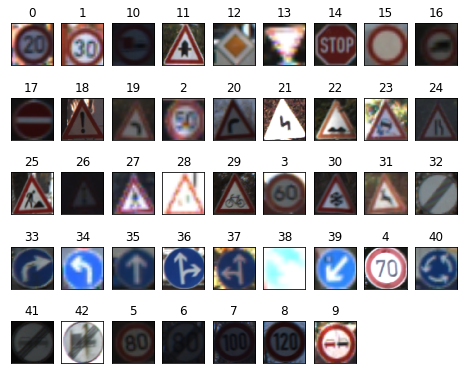

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
#!pip install keras
from sklearn.utils import shuffle
train_files, train_signs, train_bboxes, train_labels = shuffle(train_files, train_signs, train_bboxes, train_labels)
# plt.imshow(cv2.cvtColor(train_images.get(train_files[0])[0], cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(train_signs[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(train_bboxes[0])
# print(train_labels[0])

# Data pre-processing
tr_signs = np.array(train_signs)[0:600]
tr_labels = np.array(train_labels)[0:600]
va_signs = np.array(train_signs)[600:852]
va_labels = np.array(train_labels)[600:852]
te_signs = np.array(test_signs)
te_labels = np.array(test_labels)

# Normalize the images to be values in range [0, 1]
tr_signs = tr_signs.astype('float32')
va_signs = va_signs.astype('float32')
te_signs = te_signs.astype('float32')
tr_signs /= 255.0
va_signs /= 255.0
te_signs /= 255.0

from keras.utils import np_utils
# Converts a class vector (integers) to binary class matrix
tr_labels = np_utils.to_categorical(tr_labels, num_classes)
va_labels = np_utils.to_categorical(va_labels, num_classes)
te_labels = np_utils.to_categorical(te_labels, num_classes)

print("Ready!")

Ready!


In [0]:
# Tensorboard
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
print("Ready!")

Ready!


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras import optimizers

mlp = Sequential() 
mlp.add(Flatten(input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3)))
mlp.add(Activation('relu'))
mlp.add(Dropout(0.3)) 
mlp.add(Dense(1000))
mlp.add(Activation('relu'))
mlp.add(Dropout(0.3))
mlp.add(Dense(750))
mlp.add(Activation('relu'))
mlp.add(Dropout(0.3))
mlp.add(Dense(num_classes))
mlp.add(Activation('softmax'))

opt = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.99, nesterov=True)

mlp.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
activation_9 (Activation)    (None, 150528)            0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 150528)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              150529000 
_________________________________________________________________
activation_10 (Activation)   (None, 1000)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 750)              

Train on 600 samples, validate on 252 samples
Epoch 1/150
600/600 [==============================] - 2s 3ms/step - loss: 3.7588 - acc: 0.0633 - val_loss: 3.4644 - val_acc: 0.1032
Epoch 2/150
600/600 [==============================] - 2s 3ms/step - loss: 3.5160 - acc: 0.1300 - val_loss: 3.2786 - val_acc: 0.1905
Epoch 3/150
600/600 [==============================] - 2s 3ms/step - loss: 3.2782 - acc: 0.2000 - val_loss: 3.1120 - val_acc: 0.3333
Epoch 4/150
600/600 [==============================] - 2s 3ms/step - loss: 2.9699 - acc: 0.2617 - val_loss: 2.9112 - val_acc: 0.3135
Epoch 5/150
600/600 [==============================] - 2s 3ms/step - loss: 2.7976 - acc: 0.3100 - val_loss: 2.7678 - val_acc: 0.3214
Epoch 6/150
600/600 [==============================] - 2s 3ms/step - loss: 2.5985 - acc: 0.3400 - val_loss: 2.5555 - val_acc: 0.3889
Epoch 7/150
600/600 [==============================] - 2s 3ms/step - loss: 2.3621 - acc: 0.4100 - val_loss: 2.5067 - val_acc: 0.4484
Epoch 8/150
600/600 [==

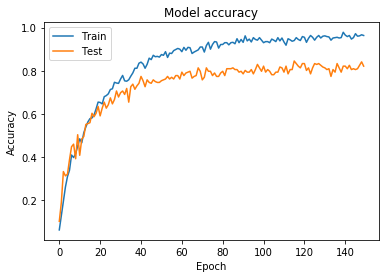

In [0]:
data = mlp.fit(tr_signs,
               tr_labels,
               batch_size=25,
               epochs=150,
               verbose=1,
               validation_data=(va_signs, va_labels),
               callbacks=[tensorboard])

start = time()
loss, acc = mlp.evaluate(te_signs, te_labels, verbose=0)
end = time()
print('ffNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

plt.plot(data.history['acc'])
plt.plot(data.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# CIFAR 100 Dataset

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from keras.datasets import cifar100
(_x_train, _y_train), (_x_test, _y_test) = cifar100.load_data(label_mode='fine')


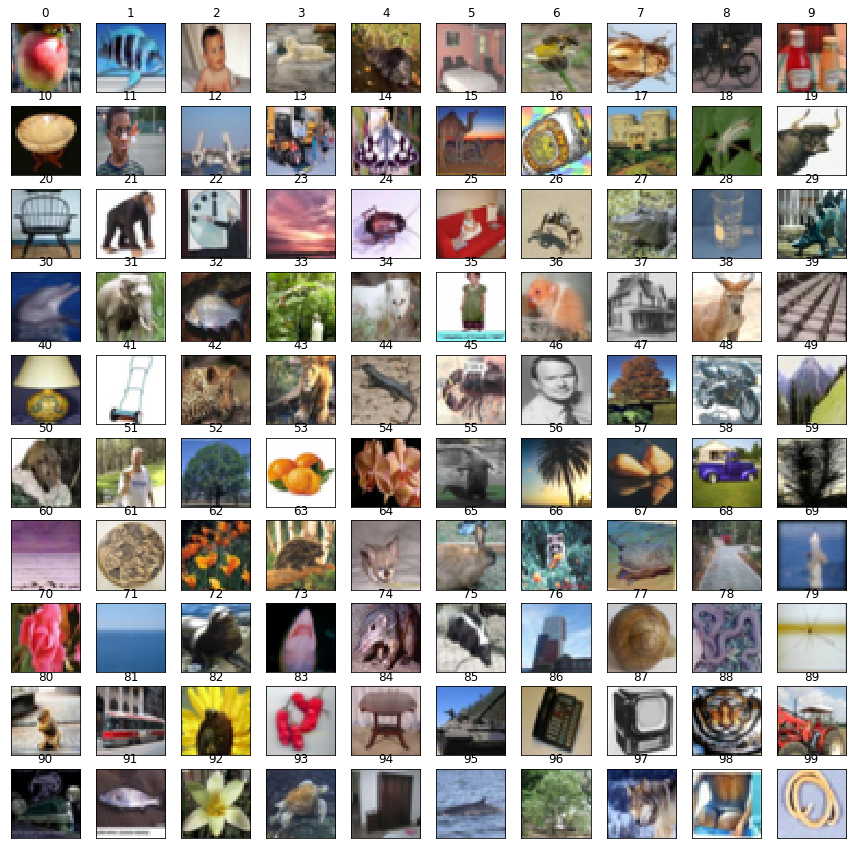

In [0]:
# Show examples from each class
class_names = np.unique(_y_train)
num_classes = len(class_names)

fig, axes = plt.subplots(10, 10,figsize=(15,15))
for i in range(num_classes):
    ax = axes.flatten()[i]
    indices = np.where(np.isin(_y_train, class_names[i]))[0]
    ax.imshow(_x_train[int(np.random.choice(indices, 1))])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(i)
plt.show()

In [0]:
# Data pre-processing
x_val = _x_train[40000:]
y_val = _y_train[40000:]
x_train = _x_train[:40000]
y_train = _y_train[:40000]
x_test = _x_test
y_test = _y_test

# Normalize the images to be values in range [0, 1]
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

from keras.utils import np_utils
# Converts a class vector (integers) to binary class matrix
tr_labels = np_utils.to_categorical(y_train, num_classes)
va_labels = np_utils.to_categorical(y_val, num_classes)
te_labels = np_utils.to_categorical(y_test, num_classes)

CIFAR_SIZE = (32, 32)

In [0]:
# Callbacks
from time import time
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping


tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
earlyStopping = EarlyStopping(monitor='val_loss',mode="min", patience=5)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras import optimizers

mlp = Sequential() 
mlp.add(Flatten(input_shape=(CIFAR_SIZE[0], CIFAR_SIZE[1], 3)))
mlp.add(Activation('relu'))
mlp.add(Dropout(0.3)) 
mlp.add(Dense(1000))
mlp.add(Activation('relu'))
mlp.add(Dropout(0.3))
mlp.add(Dense(750))
mlp.add(Activation('relu'))
mlp.add(Dropout(0.3))
mlp.add(Dense(num_classes))
mlp.add(Activation('softmax'))

opt = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.99, nesterov=True)

mlp.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
activation_13 (Activation)   (None, 3072)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              3073000   
_________________________________________________________________
activation_14 (Activation)   (None, 1000)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 750)              

In [0]:
data = mlp.fit(x_train, tr_labels, 
               batch_size=32,
               epochs=100, 
               verbose=1,
               validation_data=(x_val, va_labels), 
               callbacks=[tensorboard])

start = time()
loss, acc = mlp.evaluate(x_test, te_labels, verbose=0)
end = time()
print('ffNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))



ffNN took 0.5275743007659912 seconds
Test loss: 2.9994858154296873 - Accuracy: 0.2857


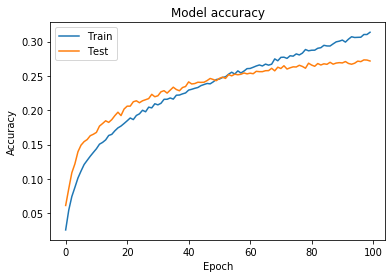

In [0]:
plt.plot(data.history['acc'])
plt.plot(data.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()